# Лабораторная по pandas, numpy, scipy.stats, matplotlib, seaborn


### Дедлайн: 22 декабря 23:59

Работа принимается один раз, как только вы отправили ее своему семинаристу по любому канаду связи.

Плагиат будет караться полной отменой баллов за лабораторную. 


 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)
 - [Официальная документация scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

# Часть 1 `Numpy`, `Matplotlib`, `scipy.stats`

In [4]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

## 1. Данные

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1 (3 балла)
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [ ]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = <...>

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [ ]:
coin(size=10)

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

**Решение**

In [9]:
def uniform(size=1, precision=30):
    shape = size if isinstance(size, tuple) else (size,)
    amount_numbers = np.prod(shape)

    bits = np.random.randint(0, 2, amount_numbers * precision)

    binary_array = bits.reshape((amount_numbers, precision))

    power_of_two = np.power((1 / 2), np.arange(1, precision + 1))
    numbers = np.dot(binary_array, power_of_two)

    return np.reshape(numbers, shape)

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

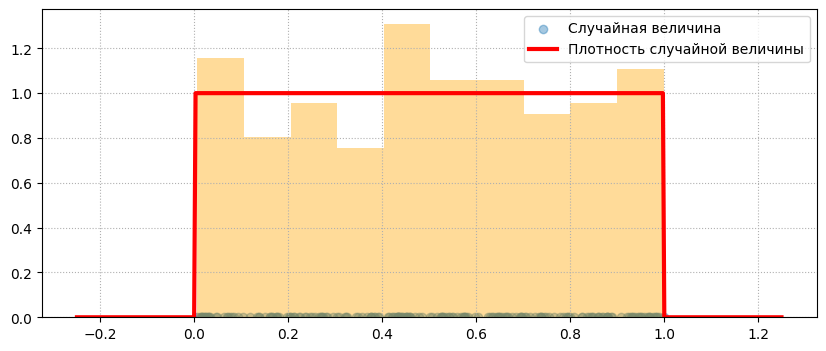

In [10]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample,
    bins = 10,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# рисуем график плотности
plt.plot(
    grid,
    sps.uniform.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

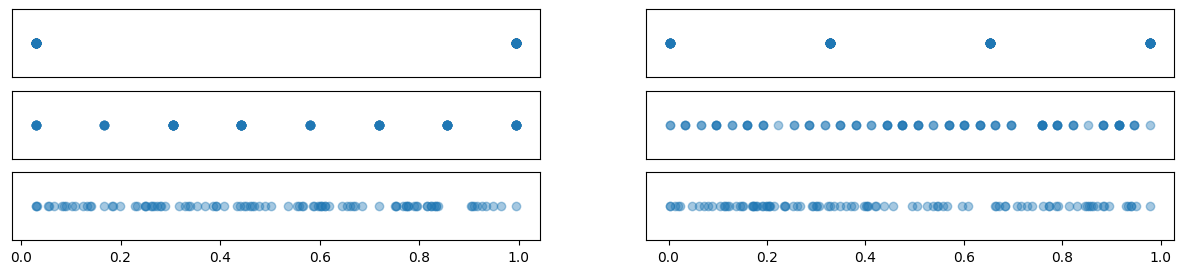

In [11]:
size = 100

plt.figure(figsize = (15, 3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size, precision),
        np.zeros(size),
        alpha = 0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

В зависимости от precision значения равномерней расплогаются на отрезке

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [13]:
def box_muller_transform(size: int, precision) -> np.ndarray:
    if size % 2 == 0:
        flag = False
        size = size//2
    else:
        flag = True
        size = (size + 1)//2

    uniform_array = uniform(size=size, precision=precision)

    cos_array = np.cos(2 * np.pi * uniform_array)
    sin_array = np.sin(2 * np.pi * uniform_array)
    log_array = np.log(uniform_array)
    log_array = np.sqrt(-2 * log_array)

    X_array = cos_array * log_array
    Y_array = sin_array * log_array

    arr =  np.concatenate((X_array, Y_array), axis=None)
    arr = arr[:-1] if flag else arr

    return arr


def normal(size=1, loc=0, scale=1, precision=30) -> np.ndarray:
    amount_numbers = size if isinstance(size, tuple) else np.prod(size)
    standart_distribution = box_muller_transform(size=amount_numbers, precision=precision)
    
    return standart_distribution * scale + loc

normal(size=20)

array([ 0.02595516,  0.27074621,  0.16891626,  0.240428  , -0.86977512,
        0.37142463,  2.42991605, -1.16891228,  1.21299708, -0.20456414,
        1.67086515, -0.06606196, -0.01519542, -0.60206204,  1.15167942,
       -0.27055258,  0.65764674,  0.58095371,  1.54937416,  1.60483655])

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

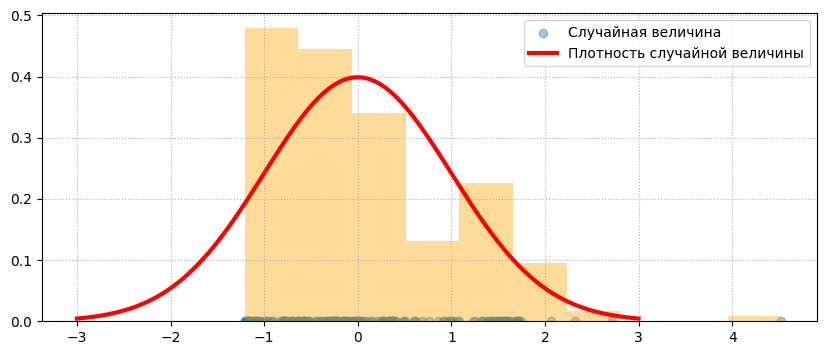

In [14]:
size = 200
grid = np.linspace(-3, 3, 500)
sample = normal(size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample,
    bins = 10,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# рисуем график плотности
plt.plot(
    grid,
    sps.norm.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

Решение основывается на **методе обратного преобразования**

Поскольку ф-ия экспоненциального распределения $F(x) = (1 - e^{-\lambda x}) \cdot I(x > 0)$ является строго монотонной и непрерывной на $R$, то у неё есть обратная ф-ия $F^{-1}: [0, 1] \rightarrow R$. 
Таким образом, если $U_1, \ldots, U_n$ - выборка из равномерного распределения, то $X_1, \ldots, X_n,$ где $X_i = F^{-1}(U_i),$ - выборка из экспоненциального распределения

$F^{-1}(x) = -\dfrac{1}{\lambda}{ }\ln(1 - x)$

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [15]:
def expon(size=1, lambd=1, precision=30):
    sample = uniform(size=size, precision=precision)
    lambd = -1 / lambd
    return lambd * np.log(1-sample)

expon(10)

array([0.33897127, 0.04585384, 0.98982441, 0.26240159, 0.73001751,
       1.35477323, 0.16893783, 2.12403858, 0.97203575, 1.30153814])

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

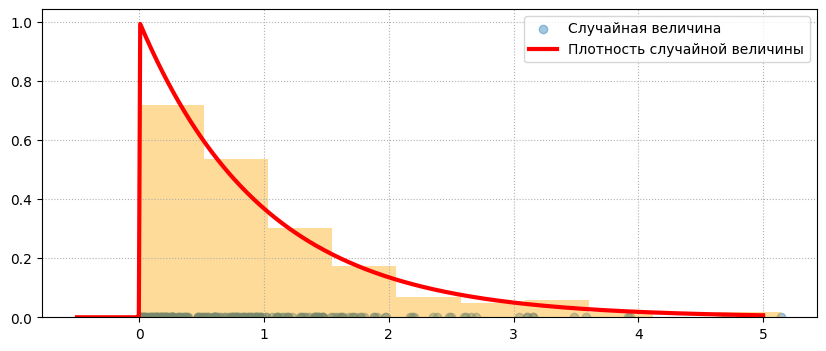

In [18]:
size = 200
grid = np.linspace(-0.5, 5, 500)
sample = expon(size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample,
    bins = 10,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# рисуем график плотности
plt.plot(
    grid,
    sps.expon.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод по задаче:**

Реализованная нами expon очень схожа с настоящей, исходя из графика

### Задача 2  (3 балла)
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [19]:
def matrix_multiplication(A, B):
    return np.sum(A[:, None, :] * np.transpose(B)[None, :, :], axis=-1)

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [20]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

7.638334409421077e-14

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [21]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [22]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B)

print(10)

CPU times: total: 62.5 ms
Wall time: 90.9 ms
CPU times: total: 0 ns
Wall time: 37.1 ms
CPU times: total: 15.6 ms
Wall time: 999 µs
CPU times: total: 8.16 s
Wall time: 10.7 s
CPU times: total: 0 ns
Wall time: 34 ms
10


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [23]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.

    '''

    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)

    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))

    C = np.sum(A[:, None, :] * np.transpose(B)[None, :, :], axis=-1)

    return C

### Задача 3  (4 балла)

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [ ]:
<...>

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

In [ ]:
<...>

Как вид траектории зависит от $\sigma$?

In [ ]:
<...>

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

In [ ]:
<...>

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

In [ ]:
<...>

### Задача 4  (4 баллов)

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1. На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2. Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3. Сделать выводы о свойтсвах параметров каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Дискретное равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. Можно использовать функции из `scipy`. Сделать виджеты недостаточно, поскольку они не сохраняются.

In [ ]:
<...>

# Часть 2 `Pandas`, `Matplotlib`, `Seaborn`

## Задача 1  (2 балла)

Начнем с необходимых приготовлений.

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [26]:
coins = pd.read_csv('coins.csv')

Посмотрим что получилось

In [27]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете?

In [28]:
coins['symbol'].value_counts().shape[0]

66

#### 2. За какой период данные мы имеем? 

In [29]:
start = coins['date'].min()
final = coins['date'].max()
print('start date: {}\nfinal date: {}'.format(start, final))

start date: 2013-04-28
final date: 2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? 

In [30]:
coins.shape
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

#### 4. У какой монеты и когда была самая высокая цена? 

In [31]:
coins.iloc[coins['price'].idxmax()][['name', 'date']]

name       Bitcoin
date    2017-12-17
Name: 25971, dtype: object

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. 

In [32]:
max_cap = coins.groupby('symbol').price.sum().idxmax()
min_cap = coins.groupby('symbol').price.sum().idxmin()
print('max capitalize coin {}\nmin capitalize coin {}'.format(max_cap, min_cap))

max capitalize coin BTC
min capitalize coin VEN


## 2. Визуализация (2 балла)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [34]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date) & (coins['symbol'] == symbol)]
    
    up = data[data.close >= data.open]
    down = data[data.close < data.open]

    plt.figure(figsize=(30, 5))

    plt.bar(up.date, up.high - up.low, bottom=up.low, width=0.05, color='green')
    plt.bar(up.date, up.close - up.open,bottom=up.open, width=0.5, color='green')

    plt.bar(down.date, down.high - down.low, bottom=down.low, width=0.05, color='red')
    plt.bar(down.date, down.open - down.close, bottom=down.close, width=0.5, color='red')

    plt.xticks(rotation=90, ha='left')
    plt.tick_params(axis='x', which='major', labelsize=4)

    plt.show()


Посмотрим, что получилось:

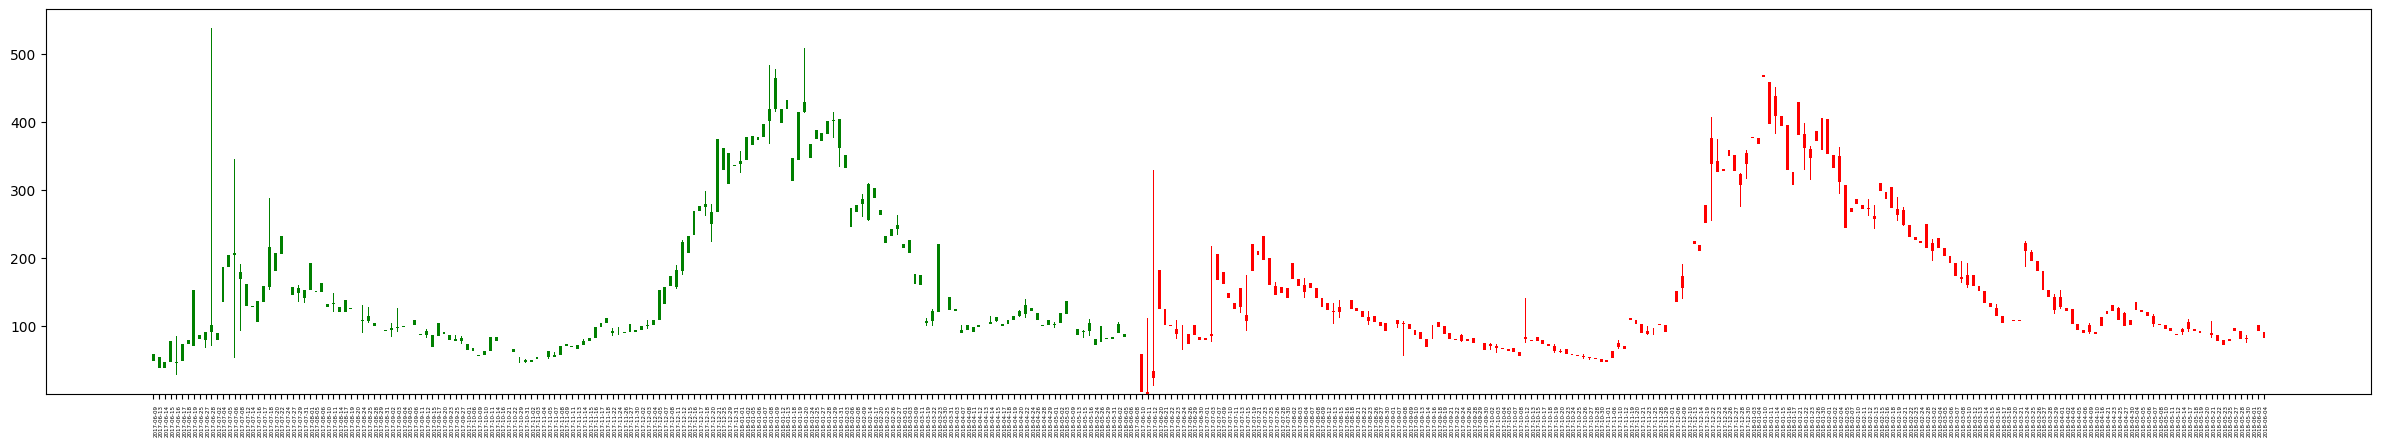

In [35]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (2 балла)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [36]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date) & (coins['symbol'] == symbol)]
    tmp = data['high'] / data[['open', 'close']].max(axis=1)
    return tmp.max()

In [37]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

1.1428940004366206

#### Сравните эти значения для разных монет.

In [38]:
ltc = find_most_severe_pump_and_dump(
    coins=coins,
    symbol='LTC',
    start_date='1999-01-01',
    end_date='2222-22-22'
)

doge = find_most_severe_pump_and_dump(
    coins=coins,
    symbol='DOGE',
    start_date='1999-01-01',
    end_date='2222-22-22'
)

print('pup\'n\'dump: doge {}\npup\'n\'dump: ltc {}\n'.format(doge, ltc))

pup'n'dump: doge 2.8963210702341136
pup'n'dump: ltc 1.4549071618037137



## 4. Окупаемость инвестиций (2 балла)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [39]:
def compute_roi(coins, investments, start_date, end_date):
    data = coins[coins.symbol.isin(list(investments.keys()))]
    start_price = data[data['date'] == start_date].groupby('symbol', group_keys=True).open.min()
    end_price = data[data['date'] == end_date].groupby('symbol', group_keys=True).close.max()
    return (start_price - end_price) * pd.Series(investments)

In [40]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

symbol
BTC   -85040.0
LTC     6995.0
dtype: float64

In [41]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

symbol
BTC   -7524210.0
LTC     -59040.0
dtype: float64

## 5. Технический анализ (2 балла)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [42]:
def plot_bollinger_bands(coins, symbol, window, width):
    data = pd.DataFrame(coins, columns=['date', 'close'])

    data['MA'] = data['close'].rolling(window=window).mean()
    data['STD'] = data['close'].rolling(window=window).std()
    data['STD'] = data['STD'].mul(width)
    data['upper'] = data['MA'] + data['STD']
    data['lower'] = data['MA'] - data['STD']
    data = data.dropna()

    plt.figure(figsize=(12,6))

    t = data['date']
    plt.plot(t, data['close'], label='close')
    plt.plot(t, data['lower'], label='lower')
    plt.plot(t, data['upper'], label='upper')
    plt.plot(t, data['MA'], label='moving average')

    plt.xlabel('date')
    plt.ylabel('price')
    plt.legend(loc='best')
    
    plt.show()


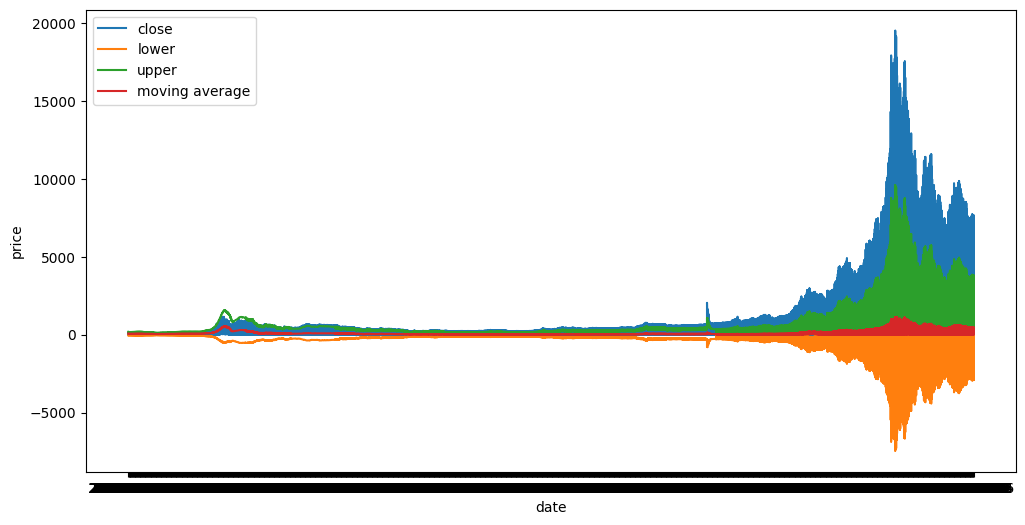

In [43]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

График показывает, что close оказалось выше чем максимальная предпологаемая цена.

## 6. Капитализация как индикатор (3 балла)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [44]:
def plot_coins_capitalizations(coins, symbols, start_date):
    data = coins[coins.symbol.isin(symbols)]
    data = data[data['date'] >= start_date].groupby('symbol', group_keys=True).price.sum()
    summ = data.sum()
    fig, axs = plt.subplots(2)
    
    axs[0].plot(data, label='capitalize', color='orange')
    axs[1].plot(data.mul(1 / summ), label='part capitalize', color='blue')
    
    
    axs[0].legend(loc='best')
    axs[1].legend(loc='best')

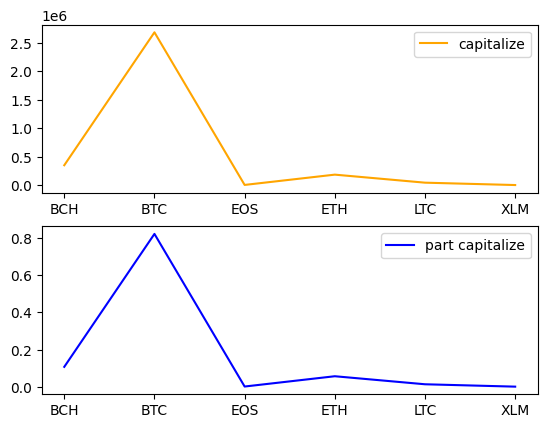

In [45]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Доля капитализации биткойна выше 80%, что в 4 раза больше, чем альткойнов. Возможная причина в статусе биткойна как надежная монета, а также в том, что многоие альткоины идут как парные с бикойном монеты. 


## 7. Корреляции монет (3 балла)

#### Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    <...>

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)